In [61]:
from math import sqrt, pi
import numpy as np
import scipy
import matplotlib.pyplot as plt
from numpy import exp, mod, pi
from scipy import integrate


In [64]:
numel = lambda x:np.size(x)
reshape = lambda x, M, N :x.reshape(M,N,order='F').copy()


3

In [70]:
def plot_complex_sig(x, t):
    plt.subplot(1, 2, 1)
    plt.plot(t,np.real(x), 'm')

    plt.subplot(1, 2, 2)
    plt.plot(t,np.imag(x), 'g')

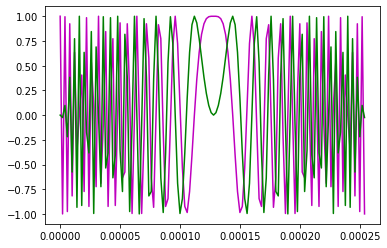

In [115]:
bw = 500e3
sf = 7
M = 2**sf
mu = (bw**2)/M
T = M/bw
fs = bw
chirp_sig = lambda t:exp(1j*2*pi*((mu*t/2) - (bw/2))*t)

t = np.arange(0, T, 1/fs, dtype=np.double)

# shi = 2*pi*((mu*t/2) - (bw/2))*t
# sig = exp(1j*shi)

sig = chirp_sig(t)

# plt.subplot(1, 2, 1)
plt.plot(t,np.real(sig), 'm')

# plt.subplot(1, 2, 2)
plt.plot(t,np.imag(sig), 'g')

In [116]:
len(sig)

128

In [117]:
x = np.array(range(int(2**sf)))

In [118]:
x

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127])

In [181]:
Ts      = (2**sf)/bw 
Ns      = fs*M/bw

gamma   = x/Ts 
beta    = bw/Ts 

In [182]:
time = (1/fs)*np.array(range(int(Ns)))

In [183]:
gamma1 = np.matrix(gamma.reshape(1,-1))

In [184]:
gamma1.shape

(1, 128)

In [185]:
bt = beta*time

In [186]:
bt1 = np.matrix(bt.reshape(-1,1))#.shape

In [187]:
bt1.shape

(128, 1)

In [188]:
freq  = mod(gamma1 + 1*bt1,bw) - bw/2

In [189]:
freq

matrix([[-250000.  , -246093.75, -242187.5 , ...,  238281.25,  242187.5 ,
          246093.75],
        [-246093.75, -242187.5 , -238281.25, ...,  242187.5 ,  246093.75,
         -250000.  ],
        [-242187.5 , -238281.25, -234375.  , ...,  246093.75, -250000.  ,
         -246093.75],
        ...,
        [ 238281.25,  242187.5 ,  246093.75, ...,  226562.5 ,  230468.75,
          234375.  ],
        [ 242187.5 ,  246093.75, -250000.  , ...,  230468.75,  234375.  ,
          238281.25],
        [ 246093.75, -250000.  , -246093.75, ...,  234375.  ,  238281.25,
          242187.5 ]])

In [190]:
freq.shape

(128, 128)

In [172]:
th = gamma1 + 1*bt1

In [173]:
th.shape

(128, 128)

In [204]:
freq[0,:]

matrix([[-250000.  , -246093.75, -242187.5 , -238281.25, -234375.  ,
         -230468.75, -226562.5 , -222656.25, -218750.  , -214843.75,
         -210937.5 , -207031.25, -203125.  , -199218.75, -195312.5 ,
         -191406.25, -187500.  , -183593.75, -179687.5 , -175781.25,
         -171875.  , -167968.75, -164062.5 , -160156.25, -156250.  ,
         -152343.75, -148437.5 , -144531.25, -140625.  , -136718.75,
         -132812.5 , -128906.25, -125000.  , -121093.75, -117187.5 ,
         -113281.25, -109375.  , -105468.75, -101562.5 ,  -97656.25,
          -93750.  ,  -89843.75,  -85937.5 ,  -82031.25,  -78125.  ,
          -74218.75,  -70312.5 ,  -66406.25,  -62500.  ,  -58593.75,
          -54687.5 ,  -50781.25,  -46875.  ,  -42968.75,  -39062.5 ,
          -35156.25,  -31250.  ,  -27343.75,  -23437.5 ,  -19531.25,
          -15625.  ,  -11718.75,   -7812.5 ,   -3906.25,       0.  ,
            3906.25,    7812.5 ,   11718.75,   15625.  ,   19531.25,
           23437.5 ,   27343.75,  

In [203]:
time.reshape(1,-1)

array([[0.00e+00, 2.00e-06, 4.00e-06, 6.00e-06, 8.00e-06, 1.00e-05,
        1.20e-05, 1.40e-05, 1.60e-05, 1.80e-05, 2.00e-05, 2.20e-05,
        2.40e-05, 2.60e-05, 2.80e-05, 3.00e-05, 3.20e-05, 3.40e-05,
        3.60e-05, 3.80e-05, 4.00e-05, 4.20e-05, 4.40e-05, 4.60e-05,
        4.80e-05, 5.00e-05, 5.20e-05, 5.40e-05, 5.60e-05, 5.80e-05,
        6.00e-05, 6.20e-05, 6.40e-05, 6.60e-05, 6.80e-05, 7.00e-05,
        7.20e-05, 7.40e-05, 7.60e-05, 7.80e-05, 8.00e-05, 8.20e-05,
        8.40e-05, 8.60e-05, 8.80e-05, 9.00e-05, 9.20e-05, 9.40e-05,
        9.60e-05, 9.80e-05, 1.00e-04, 1.02e-04, 1.04e-04, 1.06e-04,
        1.08e-04, 1.10e-04, 1.12e-04, 1.14e-04, 1.16e-04, 1.18e-04,
        1.20e-04, 1.22e-04, 1.24e-04, 1.26e-04, 1.28e-04, 1.30e-04,
        1.32e-04, 1.34e-04, 1.36e-04, 1.38e-04, 1.40e-04, 1.42e-04,
        1.44e-04, 1.46e-04, 1.48e-04, 1.50e-04, 1.52e-04, 1.54e-04,
        1.56e-04, 1.58e-04, 1.60e-04, 1.62e-04, 1.64e-04, 1.66e-04,
        1.68e-04, 1.70e-04, 1.72e-04, 1.74e-04, 

In [201]:
Theta = integrate.cumtrapz(time.reshape(1,-1),freq[0,:], initial=0)

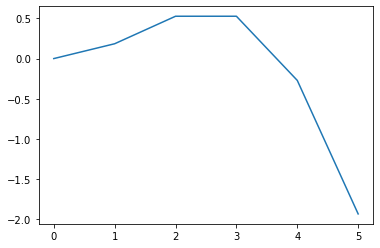

In [220]:
xc = np.arange(0, pi+pi/5, pi/5, dtype=np.double)
yc = np.sin(xc)
y_int = integrate.cumtrapz(xc,yc, initial=0)
plt.plot(y_int)


In [221]:
y_int

array([ 0.        ,  0.18465818,  0.52703328,  0.52703328, -0.27184195,
       -1.9337656 ])

In [218]:
# xc

In [219]:
# yc

In [208]:
integrate.cumtrapz(time.reshape(1,-1),freq[1,:], initial=0)

array([[ 0.00000000e+00,  3.90625000e-03,  1.56250000e-02,
         3.51562500e-02,  6.25000000e-02,  9.76562500e-02,
         1.40625000e-01,  1.91406250e-01,  2.50000000e-01,
         3.16406250e-01,  3.90625000e-01,  4.72656250e-01,
         5.62500000e-01,  6.60156250e-01,  7.65625000e-01,
         8.78906250e-01,  1.00000000e+00,  1.12890625e+00,
         1.26562500e+00,  1.41015625e+00,  1.56250000e+00,
         1.72265625e+00,  1.89062500e+00,  2.06640625e+00,
         2.25000000e+00,  2.44140625e+00,  2.64062500e+00,
         2.84765625e+00,  3.06250000e+00,  3.28515625e+00,
         3.51562500e+00,  3.75390625e+00,  4.00000000e+00,
         4.25390625e+00,  4.51562500e+00,  4.78515625e+00,
         5.06250000e+00,  5.34765625e+00,  5.64062500e+00,
         5.94140625e+00,  6.25000000e+00,  6.56640625e+00,
         6.89062500e+00,  7.22265625e+00,  7.56250000e+00,
         7.91015625e+00,  8.26562500e+00,  8.62890625e+00,
         9.00000000e+00,  9.37890625e+00,  9.76562500e+0

In [174]:
freq

matrix([[-250000.  , -246093.75, -242187.5 , ...,  238281.25,  242187.5 ,
          246093.75],
        [-246093.75, -242187.5 , -238281.25, ...,  242187.5 ,  246093.75,
         -250000.  ],
        [-242187.5 , -238281.25, -234375.  , ...,  246093.75, -250000.  ,
         -246093.75],
        ...,
        [ 238281.25,  242187.5 ,  246093.75, ...,  226562.5 ,  230468.75,
          234375.  ],
        [ 242187.5 ,  246093.75, -250000.  , ...,  230468.75,  234375.  ,
          238281.25],
        [ 246093.75, -250000.  , -246093.75, ...,  234375.  ,  238281.25,
          242187.5 ]])

In [91]:
y = exp(1j*2*pi*Theta)

In [96]:
len(time)

128

In [69]:
mod_sig = reshape(exp(1j*2*pi*Theta),numel(Theta),1)

In [90]:
[mod_sig[i][0] for i in range(10)]

[(0.9987954562051724+0.049067674327418015j),
 (0.9807852804032304+0.19509032201612825j),
 (0.9039892931234433+0.4275550934302821j),
 (0.7071067811865476+0.7071067811865476j),
 (0.33688985339222005+0.9415440651830208j),
 (-0.1950903220161282+0.9807852804032304j),
 (-0.7409511253549589+0.6715589548470186j),
 (-1+1.2246467991473532e-16j),
 (-0.6715589548470187-0.7409511253549589j),
 (0.1950903220161283-0.9807852804032304j)]

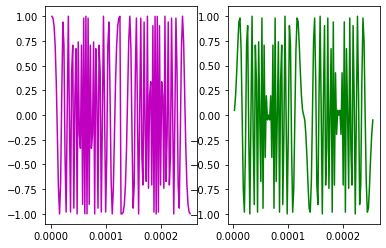

In [98]:
plot_complex_sig(y, time[1:])
# np.real(y)
# plt.plot(y)

In [100]:
y

array([ 0.99879546+4.90676743e-02j,  0.98078528+1.95090322e-01j,
        0.90398929+4.27555093e-01j,  0.70710678+7.07106781e-01j,
        0.33688985+9.41544065e-01j, -0.19509032+9.80785280e-01j,
       -0.74095113+6.71558955e-01j, -1.        +1.22464680e-16j,
       -0.67155895-7.40951125e-01j,  0.19509032-9.80785280e-01j,
        0.94154407-3.36889853e-01j,  0.70710678+7.07106781e-01j,
       -0.42755509+9.03989293e-01j, -0.98078528-1.95090322e-01j,
        0.04906767-9.98795456e-01j,  1.        -4.89858720e-16j,
       -0.04906767+9.98795456e-01j, -0.98078528-1.95090322e-01j,
        0.42755509-9.03989293e-01j,  0.70710678+7.07106781e-01j,
       -0.94154407+3.36889853e-01j,  0.19509032-9.80785280e-01j,
        0.67155895+7.40951125e-01j, -1.        +1.10218212e-15j,
        0.74095113-6.71558955e-01j, -0.19509032+9.80785280e-01j,
       -0.33688985-9.41544065e-01j,  0.70710678+7.07106781e-01j,
       -0.90398929-4.27555093e-01j,  0.98078528+1.95090322e-01j,
       -0.99879546-4.9067